In [3]:
#동적 생성되는 data 크롤링
#Selenium 모듈 사용
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import selenium
from selenium import webdriver

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 관련 메서드
- get(url) : url에 접근하는 메서드
    
## 페이지 단일 element에 접근하는 메서드
- find_element_by_name('html_name')
- find_element_by_id('html_id')
- find_element_by_xpath('패스경로') : 스크립트 실행 경로를 찾아 접근
    
    
## 페이지의 여러 element에 접근하는 메서드
- find_element_by_class_selector('html slelctor')
- find_element_by_class_name('html_class')
- find_element_by_tag_name('html tag')

## Webdriver 객체 생성
- driver = webdriver.Chrome(드라이버경로)

## 접근한 페이지 source 추출
- html=driver.page_source

In [5]:
# 크롬 드라이버를 통한 네이버 접속

driver = webdriver.Chrome("./driver/chromedriver")
driver.get("https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=001&aid=0012587876")


#main_content > div.article_header > div.article_info > div > div.article_btns > div.article_btns_left > div > a > span.u_likeit_text._count.num
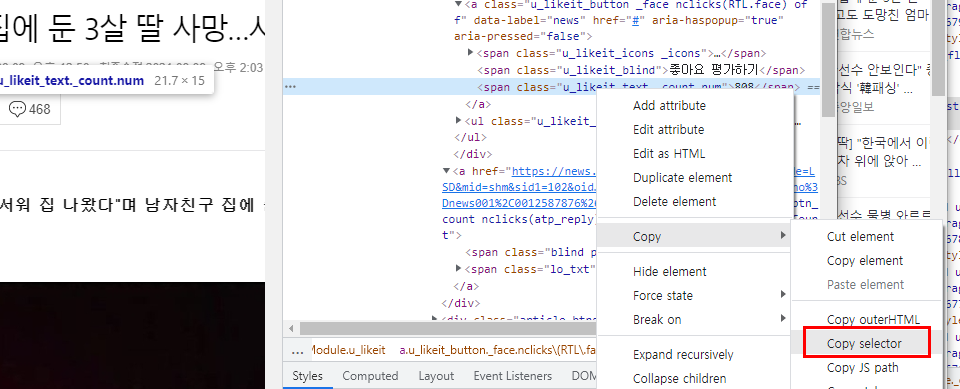


'<html lang="ko" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36"><head>\n<meta charset="euc-kr">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="referrer" contents="always">\n<meta name="viewport" content="width=1106">\n<title>혼자 집에 둔 3살 딸 사망…시신 발견하고도 도망친 엄마 : 네이버 뉴스</title>\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\n\t\t\n\t\t\n\t\t\n\t\n\t\n\n<meta property="me2:post_tag" content="연합뉴스 : 네이버뉴스">\n<meta property="me2:category1" content="연합뉴스">\n<meta property="me2:category2" content="사회">\n<meta property="me2:image" content="">\n\n<meta property="og:title" content="혼자 집에 둔 3살 딸 사망…시신 발견하고도 도망친 엄마">\n<meta property="og:type" content="article">\n<meta property="og:url" content="https://news.naver.com/main/read.naver?mode=LSD&amp;mid=sec&amp;oid=001&amp;aid=0012587876&amp;sid1=001">\n<meta property="og:image" content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_2016
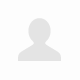
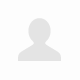

In [6]:
driver.page_source # 전체 페이지 소스 로딩

In [9]:
# 좋아요 수
like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
like_num = [like.text for like in like_list ]
like_num

['1,100']

In [10]:
# 좋아요 수
# 에러 발생 리스트 선언시

#웹 리모트 객체라서 다른 변수 옯겨서 출력하는 것이 좋음
like_list = driver.find_element_by_css_selector('span.u_likeit_text._count.num')
type(like_list)
driver.find_element_by_css_selector('span.u_likeit_text._count.num').text


selenium.webdriver.remote.webelement.WebElement

'1,100'

In [ ]:
#articleTitleCommentCount > span.lo_txt

In [11]:
rep_list = driver.find_elements_by_css_selector("span.lo_txt")
rep_num = [rep.text for rep in rep_list ]
rep_num

['630']

In [12]:
# 댓글 수
rep_list = driver.find_element_by_css_selector('span.lo_txt').text

driver.find_element_by_css_selector('span.lo_txt').text
rep_list
type(like_list)


'630'

'630'

selenium.webdriver.remote.webelement.WebElement

In [13]:
# 전달된 뉴스  url의 기사에서 기사제목 기사입력시간을 반환하는 함수
def get_news_sub_info(url) :
    
    #1.전달된 url에 접속 후 응답객체 반환
    headers ={"User-Agent" : 
          "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
    result = requests.get(url,headers=headers)
    
    #2.bs4 객체 생성
    bs_obj=BeautifulSoup(result.content,"html.parser")
    
    #3.필요 데이터 추출
    # 기사 제목 추출(태그객체)
    title =bs_obj.find(id='articleTitle')
    # 기사 입력시간 추출(태그객체)
    date_time = bs_obj.find("span",{"class":"t11"})
    
    #4.  webdriver  이용해서 좋아요 수를 반환
#     driver = webdriver.Chrome("./driver/chromedriver")
    time.sleep(2)
    driver.get(url)
    driver.page_source
   
    # 좋아요 수
    like_list = driver.find_elements_by_css_selector("span.u_likeit_text._count.num")
    like_num = [like.text for like in like_list ]
    print(like_num)
    #댓글 수
    rep_list = driver.find_elements_by_css_selector("span.lo_txt")
    rep_num = [rep.text for rep in rep_list ]
    print(rep_num)
    
    #5.수집 데이터 dict로 구성 후 반환
    dict_sub ={}
    dict_sub["기사제목"] = title.text
    dict_sub["기사 입력 시간"]=date_time.text
    dict_sub['좋아요 수'] = like_num
    dict_sub['댓글 수'] =  rep_num
    
    return dict_sub 

In [14]:
url = "https://news.naver.com"
headers={"User-Agent":
             "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}
result = requests.get(url,headers=headers)

bs_obj = BeautifulSoup(result.content,"html.parser")

#ul 태그 추출 : class:hdline_article_list
news_list = bs_obj.find("ul",{"class":"hdline_article_list"})
#모든 li 추출
lis = news_list.findAll("li")

#헤드라인뉴스 link 저장 - list
link_list=[]
for li in lis :
    a_tag = li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)

driver = webdriver.Chrome("./driver/chromedriver")

import time ## 정닥히 딜레이를 주기 위해

for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)
    time.sleep(1) # 딜레이 위치는 개발자 자유


['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=101&oid=011&aid=0003947727', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=055&aid=0000913437', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=421&aid=0005532170', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=014&aid=0004689258', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=214&aid=0001140835']
['2']
['']
{'기사제목': '거래소 “한국 ETF 500 종목 시대 개막”', '기사 입력 시간': '2021.08.09. 오후 4:19', '좋아요 수': ['2'], '댓글 수': ['']}
['4']
['댓글']
{'기사제목': '백신 다 맞아도 안전지대 아니다…요양병원 돌파감염 잇따라', '기사 입력 시간': '2021.08.09. 오후 3:11', '좋아요 수': ['4'], '댓글 수': ['댓글']}
['70']
['49']
{'기사제목': '靑, 법무부와 \'이재용 가석방\' 물밑 조율한 듯…文 "고충 이해"(종합)', '기사 입력 시간': '2021.08.09. 오후 8:04', '좋아요 수': ['70'], '댓글 수': ['49']}
['2']
['2']
{'기사제목': '10년 빨라진 지구온난화..2021~2040년 1.5℃ 도달', '기사 입력 시간': '2021.08.09. 오후 5:01', '좋아요 수': ['2'], '댓글 수': ['2']}
['2']
['댓글']
{'기사제목': '국민의힘 "이재용 가석방, 어려

- 해당 헤드라인 링크

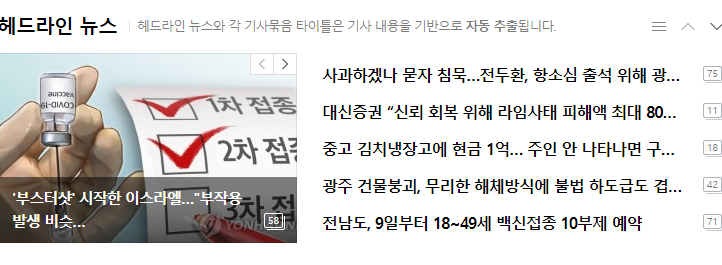

In [70]:
for number in range(len(link_list)) :
    res = get_news_sub_info(link_list[number])
    print(res)


[]
['']
{'기사제목': '에디슨모터스 "쌍용차 구조조정 없다…\'전기차 기술력\'으로 극복"', '기사 입력 시간': '2021.08.09. 오후 2:12', '좋아요 수': [], '댓글 수': ['']}
[]
['']
{'기사제목': "아프리카돼지열병에 '金겹살' 우려…농장간 수평전파 차단이 '관건'", '기사 입력 시간': '2021.08.09. 오후 2:51', '좋아요 수': [], '댓글 수': ['']}
[]
['']
{'기사제목': '7月 고용보험 가입자, 48.5만명↑…1년9개월만 최대폭 증가', '기사 입력 시간': '2021.08.09. 오후 12:00', '좋아요 수': [], '댓글 수': ['']}
[]
['']
{'기사제목': '비트코인, 1차 저항선 4만5000달러까지 돌파…낙관론 대두 [코인 시세]', '기사 입력 시간': '2021.08.09. 오전 7:50', '좋아요 수': [], '댓글 수': ['']}
[]
['']
{'기사제목': "[속보]2학기 개학 때 거리두기 4단계서도 '부분 등교'", '기사 입력 시간': '2021.08.09. 오후 2:41', '좋아요 수': [], '댓글 수': ['']}
